<a href="https://colab.research.google.com/github/gustavopierre/mushrooms/blob/main/notebook/Mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://archive.ics.uci.edu/</br>
https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/gustavopierre/mushrooms/refs/heads/main/api/machinelearning/data/secondary_data.csv', sep=';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
df.shape

(61069, 21)

In [5]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

As variaveis numericas não têm valores nulos.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

Vamos transformar a variavel class em 1 e 0 e apagá-la em seguida.

In [7]:
# Manual encoding: 'e' (edible) -> 0, 'p' (poisonous) -> 1
df['class_encoded'] = df['class'].map({'e': 0, 'p': 1})

# Display the mapping applied
print("Mapping applied:")
print("e (edible): 0")
print("p (poisonous): 1")

# Display the head of the DataFrame with the new encoded column
display(df[['class', 'class_encoded']].head())

Mapping applied:
e (edible): 0
p (poisonous): 1


,class,class_encoded
0,p,1
1,p,1
2,p,1
3,p,1
4,p,1


In [8]:
# Drop the original 'class' column
df = df.drop('class', axis=1)

display(df.head())

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class_encoded
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,...,y,w,u,w,t,g,NaN,d,w,1
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,...,y,w,u,w,t,g,NaN,d,u,1
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,...,y,w,u,w,t,g,NaN,d,w,1
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,...,y,w,u,w,t,p,NaN,d,w,1
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,...,y,w,u,w,t,p,NaN,d,w,1


Verificar quantos valores únicos tem em cada variavel categorica

In [9]:
for col in df.select_dtypes(include='object').columns:
    print(f"Coluna '{col}':")
    print(df[col].unique())
    print("-" * 30)

Coluna 'cap-shape':
['x' 'f' 'p' 'b' 'c' 's' 'o']
------------------------------
Coluna 'cap-surface':
['g' 'h' nan 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']
------------------------------
Coluna 'cap-color':
['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
------------------------------
Coluna 'does-bruise-or-bleed':
['f' 't']
------------------------------
Coluna 'gill-attachment':
['e' nan 'a' 'd' 's' 'x' 'p' 'f']
------------------------------
Coluna 'gill-spacing':
[nan 'c' 'd' 'f']
------------------------------
Coluna 'gill-color':
['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
------------------------------
Coluna 'stem-root':
['s' nan 'b' 'r' 'c' 'f']
------------------------------
Coluna 'stem-surface':
['y' nan 's' 'k' 'i' 'h' 't' 'g' 'f']
------------------------------
Coluna 'stem-color':
['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
------------------------------
Coluna 'veil-type':
['u' nan]
------------------------------
Coluna 'veil-color':
['w' 'y' nan 'n' 'e' 

Vamos preencher os valores nulos das variaveis categoricas em "unknown".

In [10]:
for col in df.select_dtypes(include='object').columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna('unknown')

display(df.isnull().sum())

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
class_encoded           0
dtype: int64

Vamos aplicar o One-Hot Encoding nas variáveis categoricas.

In [11]:
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns)
display(df_encoded.head())

,cap-diameter,stem-height,stem-width,class_encoded,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,15.26,16.95,17.09,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,16.60,17.99,18.19,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,14.07,17.80,17.74,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,14.17,15.77,15.98,1,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,14.64,16.53,17.20,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Columns: 129 entries, cap-diameter to season_w
dtypes: bool(125), float64(3), int64(1)
memory usage: 9.1 MB


Separação em conjunto de treino e conjunto de teste com holdout

In [13]:
test_size = 0.20 # test set size
seed = 3 # random seed

# Separate features (X) and target (y)
X = df_encoded.drop('class_encoded', axis=1)
y = df_encoded['class_encoded']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout with stratification

# Cross-validation parameters and folds
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # stratified cross-validation

print("Train and test split performed successfully.")
print(f"Training set size (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Test set size (X_test, y_test): {X_test.shape}, {y_test.shape}")

Train and test split performed successfully.
Training set size (X_train, y_train): (48855, 128), (48855,)
Test set size (X_test, y_test): (12214, 128), (12214,)


In [14]:
X_train.head()

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
26176,11.70,8.86,24.89,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
21964,4.57,3.77,8.46,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
19762,2.46,3.39,6.14,False,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False
20756,4.54,4.24,7.09,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
18041,7.12,6.12,11.36,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


KNN: 0.999652 (0.000275)
CART: 0.999284 (0.000293)
NB: 0.633630 (0.004632)
SVM: 0.959615 (0.002575)


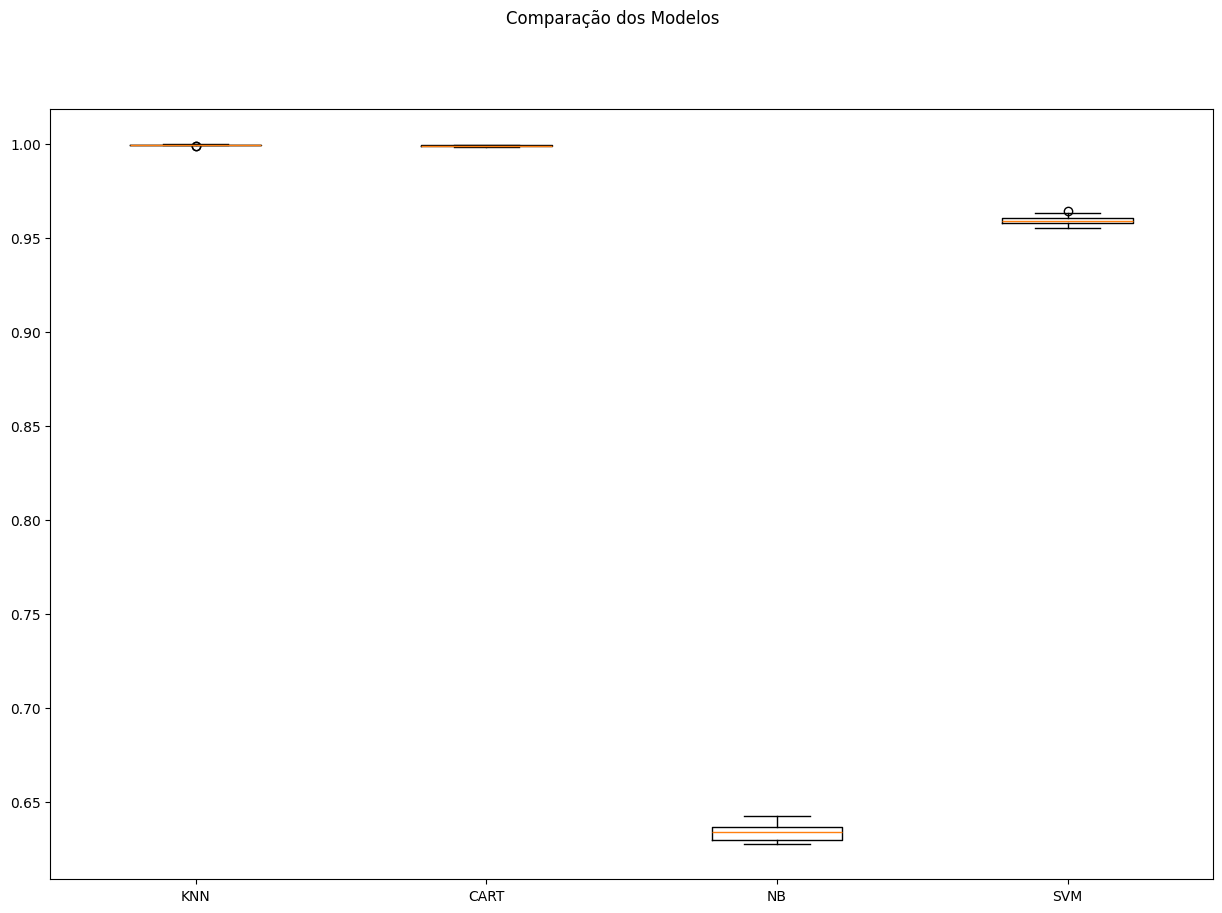

In [15]:
np.random.seed(3) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Criação e avaliação de modelos: dados padronizados e normalizados. Comentei o SVM porque esta levando muito mais tempo que os demais.

KNN-orig: 0.999652 (0.000275)
CART-orig: 0.999284 (0.000293)
NB-orig: 0.633630 (0.004632)
SVM-orig: 0.959615 (0.002575)
KNN-padr: 0.999939 (0.000094)
CART-padr: 0.999284 (0.000369)
NB-padr: 0.589724 (0.004167)
SVM-padr: 0.999325 (0.000343)
KNN-norm: 1.000000 (0.000000)
CART-norm: 0.999304 (0.000246)
NB-norm: 0.606591 (0.005181)
SVM-norm: 0.999570 (0.000371)


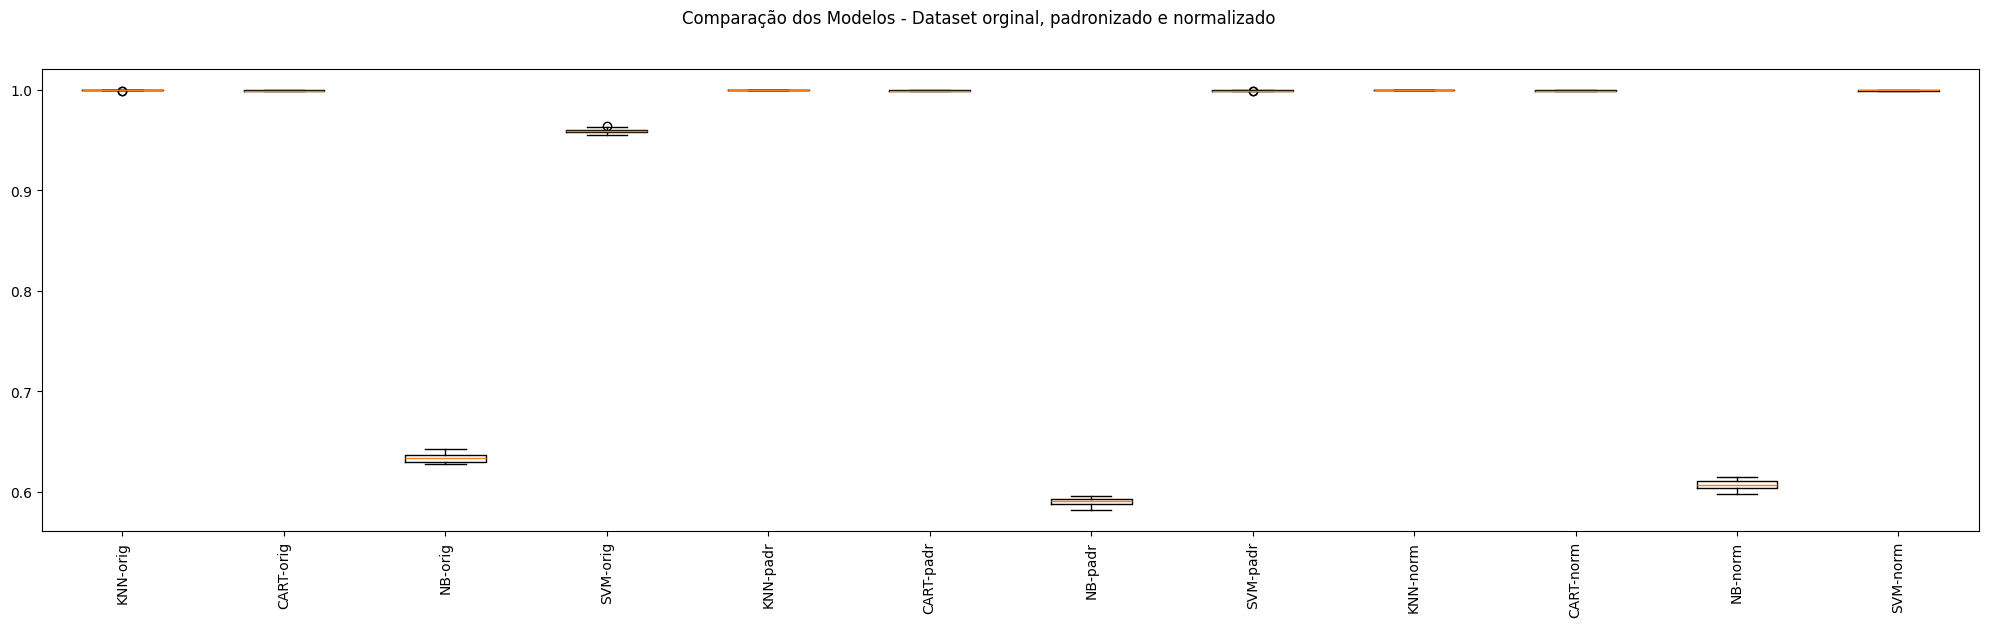

In [16]:
np.random.seed(3) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Otimização dos Hiperparametros

In [17]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.999980 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-padr - Melhor: 1.000000 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-norm - Melhor: 1.000000 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}


Finalizando o modelo

In [18]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=1)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

1.0


In [19]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'manhattan'
,metric_params,None
,n_jobs,None


Criando a função que preprocessa o dataset

In [20]:
def preprocess_new_data(new_data_df_original, trained_columns):
    """
    Applies preprocessing steps to new data based on the training data steps.

    Args:
        new_data_df_original (pd.DataFrame): DataFrame with new data in original format.
        scaler (StandardScaler): Fitted StandardScaler object from training data.
        trained_columns (pd.Index): Columns of the training data (X) after preprocessing.

    Returns:
        np.ndarray: Preprocessed and scaled new data as a NumPy array.
    """
    # 1. Handle potential missing values (fill with 'unknown' for object type columns)
    processed_data = new_data_df_original.copy() # Work on a copy to avoid modifying original
    for col in processed_data.select_dtypes(include='object').columns:
         # Ensure the column exists in the training data's original columns before filling (optional but safer)
         if col in df.columns and df[col].dtype == 'object':
              processed_data[col] = processed_data[col].fillna('unknown')


    # 2. Apply One-Hot Encoding
    processed_data_encoded = pd.get_dummies(processed_data, columns=processed_data.select_dtypes(include='object').columns)

    # 3. Reindex to ensure all columns present in the training data are present
    # Fill missing columns with 0
    processed_data_encoded = processed_data_encoded.reindex(columns=trained_columns, fill_value=0)


    return processed_data_encoded

Simulando a aplicação do modelo em dados não vistos

Gerando o pickle do modelo

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

class MushroomPipeline(BaseEstimator, TransformerMixin):
    def __init__(self, scaler, model, trained_columns=None):
        self.scaler = scaler
        self.model = model
        self.trained_columns = trained_columns
        self.fitted_pipeline = None # To store the fitted scikit-learn pipeline

    def fit(self, X, y=None):
        # 1. Handle potential missing values (fill with 'unknown' for object type columns)
        processed_data = X.copy()
        for col in processed_data.select_dtypes(include='object').columns:
            if col in processed_data.columns: # Check if column exists before filling
                 processed_data[col] = processed_data[col].fillna('unknown')


        # 2. Apply One-Hot Encoding
        processed_data_encoded = pd.get_dummies(processed_data, columns=processed_data.select_dtypes(include='object').columns)

        # Store the columns after encoding for future transformations
        self.trained_columns = processed_data_encoded.columns

        # 3. Create and fit the scikit-learn pipeline with scaler and model
        # We will build a pipeline with just the scaler and the model here, as one-hot encoding is handled manually
        # in the transform method to ensure consistency with new data.
        temp_pipeline = Pipeline([
            ('scaler', self.scaler),
            ('model', self.model)
        ])

        self.fitted_pipeline = temp_pipeline.fit(processed_data_encoded, y)

        return self

    def transform(self, X):
        if self.trained_columns is None or self.fitted_pipeline is None:
            raise RuntimeError("The pipeline has not been fitted yet.")

        # 1. Handle potential missing values (fill with 'unknown' for object type columns)
        processed_data = X.copy()
        for col in processed_data.select_dtypes(include='object').columns:
             if col in processed_data.columns: # Check if column exists before filling
                  processed_data[col] = processed_data[col].fillna('unknown')


        # 2. Apply One-Hot Encoding
        processed_data_encoded = pd.get_dummies(processed_data, columns=processed_data.select_dtypes(include='object').columns)

        # 3. Reindex to ensure all columns present in the training data are present
        # Fill missing columns with 0
        processed_data_encoded = processed_data_encoded.reindex(columns=self.trained_columns, fill_value=0)

        # 4. Apply scaling and model transformation (using the fitted scikit-learn pipeline)
        transformed_data = self.fitted_pipeline.transform(processed_data_encoded)

        return transformed_data

    def predict(self, X):
         if self.fitted_pipeline is None:
             raise RuntimeError("The pipeline has not been fitted yet.")
         transformed_X = self.transform(X)
         return self.fitted_pipeline.predict(transformed_X)

    def predict_proba(self, X):
        if self.fitted_pipeline is None:
            raise RuntimeError("The pipeline has not been fitted yet.")
        transformed_X = self.transform(X)
        # Check if the underlying model has predict_proba
        if hasattr(self.fitted_pipeline.named_steps['model'], 'predict_proba'):
            return self.fitted_pipeline.predict_proba(transformed_X)
        else:
            raise AttributeError("The underlying model does not support predict_proba.")

In [25]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the full pipeline with the complete dataset
# Recreate the scaler and model to ensure consistency
scaler = StandardScaler()
model = KNeighborsClassifier(metric='manhattan', n_neighbors=1)

# Create the custom pipeline
full_pipeline = MushroomPipeline(scaler=scaler, model=model)

# Prepare the original data (before one-hot encoding) for the pipeline
# We need to use 'df' (original data) instead of 'X' (already encoded data)
df_original_features = df.drop('class_encoded', axis=1)  # Remove target from original data
y_target = df['class_encoded']  # Target variable

# Fit the pipeline with the original dataset (before encoding)
full_pipeline.fit(df_original_features, y_target)

# Define the filename for the pickle file
filename = 'mushroom_pipeline.pkl'

# Save the fitted pipeline to the pickle file
try:
    with open(filename, 'wb') as f:
        pickle.dump(full_pipeline, f)
    print(f"Pipeline successfully saved to '{filename}'")
    print(f"Pipeline was trained on original data shape: {df_original_features.shape}")
    print(f"Target variable shape: {y_target.shape}")
except Exception as e:
    print(f"Error saving pipeline to pickle: {e}")

Pipeline successfully saved to 'mushroom_pipeline.pkl'
Pipeline was trained on original data shape: (61069, 20)
Target variable shape: (61069,)


In [27]:
import pickle
import pandas as pd
import numpy as np

# Define the filename for the pickle file
filename = 'mushroom_pipeline.pkl'

# Load the pipeline from the pickle file
try:
    with open(filename, 'rb') as f:
        loaded_pipeline = pickle.load(f)
    print(f"Pipeline successfully loaded from '{filename}'")
except FileNotFoundError:
    print(f"Error: The file '{filename}' was not found. Please ensure the pipeline was saved correctly.")
    loaded_pipeline = None
except Exception as e:
    print(f"Error loading pipeline from pickle: {e}")
    loaded_pipeline = None

# If the pipeline was loaded successfully, simulate new data and make predictions
if loaded_pipeline:
    print("\nSimulating new data for prediction...")

    # Create a sample DataFrame with the same columns as the original data BEFORE encoding
    # You should replace this with actual new data you want to predict on
    # Let's create a sample row based on the structure of 'df' (before encoding)
    # This sample data should mimic the format of your raw input data
    sample_new_data_dict = {
        'cap-diameter': [10.0],
        'cap-shape': ['x'],
        'cap-surface': ['g'],
        'cap-color': ['n'],
        'does-bruise-or-bleed': ['f'],
        'gill-attachment': ['e'],
        'gill-spacing': ['c'],
        'gill-color': ['w'],
        'stem-height': [15.0],
        'stem-width': [16.0],
        'stem-root': ['s'],
        'stem-surface': ['y'],
        'stem-color': ['w'],
        'veil-type': ['u'],
        'veil-color': ['w'],
        'has-ring': ['t'],
        'ring-type': ['g'],
        'spore-print-color': ['k'],
        'habitat': ['d'],
        'season': ['w']
    }
    sample_new_data_df = pd.DataFrame(sample_new_data_dict)

    print("Sample New Data:")
    display(sample_new_data_df)

    # Make predictions using the loaded pipeline
    try:
        predictions = loaded_pipeline.predict(sample_new_data_df)
        print("\nPredictions (0: edible, 1: poisonous):", predictions)

        # If the model supports predict_proba, you can also get probabilities
        if hasattr(loaded_pipeline, 'predict_proba'):
            probabilities = loaded_pipeline.predict_proba(sample_new_data_df)
            print("Prediction Probabilities:", probabilities)

    except Exception as e:
        print(f"\nError during prediction: {e}")

Pipeline successfully loaded from 'mushroom_pipeline.pkl'

Simulating new data for prediction...
Sample New Data:


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,10.0,x,g,n,f,e,c,w,15.0,16.0,s,y,w,u,w,t,g,k,d,w



Error during prediction: This 'Pipeline' has no attribute 'transform'
